In [11]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk("C:/Users/91951/Downloads/Crema"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/91951/Downloads/Crema\1001_DFA_ANG_XX.wav
C:/Users/91951/Downloads/Crema\1001_DFA_DIS_XX.wav
C:/Users/91951/Downloads/Crema\1001_DFA_FEA_XX.wav
C:/Users/91951/Downloads/Crema\1001_DFA_HAP_XX.wav
C:/Users/91951/Downloads/Crema\1001_DFA_NEU_XX.wav
C:/Users/91951/Downloads/Crema\1001_DFA_SAD_XX.wav
C:/Users/91951/Downloads/Crema\1001_IEO_ANG_HI.wav
C:/Users/91951/Downloads/Crema\1001_IEO_ANG_LO.wav
C:/Users/91951/Downloads/Crema\1001_IEO_ANG_MD.wav
C:/Users/91951/Downloads/Crema\1001_IEO_DIS_HI.wav
C:/Users/91951/Downloads/Crema\1001_IEO_DIS_LO.wav
C:/Users/91951/Downloads/Crema\1001_IEO_DIS_MD.wav
C:/Users/91951/Downloads/Crema\1001_IEO_FEA_HI.wav
C:/Users/91951/Downloads/Crema\1001_IEO_FEA_LO.wav
C:/Users/91951/Downloads/Crema\1001_IEO_FEA_MD.wav
C:/Users/91951/Downloads/Crema\1001_IEO_HAP_HI.wav
C:/Users/91951/Downloads/Crema\1001_IEO_HAP_LO.wav
C:/Users/91951/Downloads/Crema\1001_IEO_HAP_MD.wav
C:/Users/91951/Downloads/Crema\1001_IEO_NEU_XX.wav
C:/Users/91951/Downloads/Crema\

In [12]:
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.io import wavfile
import os.path
import IPython.display
import IPython.display as ipd
import seaborn as sns
import librosa
import librosa.display
import soundfile

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix



In [14]:
image_dir = Path('C:/Users/91951/Downloads/Crema')

In [15]:
filepaths = list(image_dir.glob(r'**/*.wav'))

In [16]:
labels = list(map(lambda x: os.path.split(x)[1].split('_')[2], filepaths))
set(labels)

{'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD'}

In [7]:
filepaths = pd.Series(filepaths, name='file_path').astype(str)
labels = pd.Series(labels, name='label')

audio_df = pd.concat([filepaths, labels], axis=1)
audio_df

,file_path,label
0,C:\Users\91951\Downloads\Crema\1001_DFA_ANG_XX...,ANG
1,C:\Users\91951\Downloads\Crema\1001_DFA_DIS_XX...,DIS
2,C:\Users\91951\Downloads\Crema\1001_DFA_FEA_XX...,FEA
3,C:\Users\91951\Downloads\Crema\1001_DFA_HAP_XX...,HAP
4,C:\Users\91951\Downloads\Crema\1001_DFA_NEU_XX...,NEU
...,...,...
7437,C:\Users\91951\Downloads\Crema\1091_WSI_DIS_XX...,DIS
7438,C:\Users\91951\Downloads\Crema\1091_WSI_FEA_XX...,FEA
7439,C:\Users\91951\Downloads\Crema\1091_WSI_HAP_XX...,HAP
7440,C:\Users\91951\Downloads\Crema\1091_WSI_NEU_XX...,NEU


<AxesSubplot:ylabel='Count'>

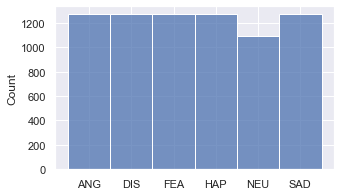

In [18]:
sns.set(rc={'figure.figsize':(5,3)})
sns.set_style('darkgrid')
sns.histplot(labels)

In [19]:
def show_samples(df):
    # Shuffle the DataFrame
    shuffled_df = df.sample(frac=1).reset_index(drop=True)

    # Iterate over unique labels in the shuffled DataFrame
    for label in shuffled_df['label'].unique():
        # Filter DataFrame for the current label
        label_df = shuffled_df[shuffled_df['label'] == label].head(1)  # Take the first example for each label

        # Extract file path and label
        file_path = label_df['file_path'].values[0]
        label = label_df['label'].values[0]

        # Load audio file using librosa
        audio, sr = librosa.load(file_path)

        # Generate the time axis for the waveform
        duration = len(audio) / sr
        time = librosa.times_like(audio, sr=sr)

        # Plot waveform
        plt.plot(time, audio)
        plt.title(f'Waveform for {label}')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.show()
        print()
        
        # Play the audio
        ipd.display(ipd.Audio(audio, rate=sr))
        print()
        print()

In [22]:
audio_df

,file_path,label
0,C:\Users\91951\Downloads\Crema\1001_DFA_ANG_XX...,ANG
1,C:\Users\91951\Downloads\Crema\1001_DFA_DIS_XX...,DIS
2,C:\Users\91951\Downloads\Crema\1001_DFA_FEA_XX...,FEA
3,C:\Users\91951\Downloads\Crema\1001_DFA_HAP_XX...,HAP
4,C:\Users\91951\Downloads\Crema\1001_DFA_NEU_XX...,NEU
...,...,...
7437,C:\Users\91951\Downloads\Crema\1091_WSI_DIS_XX...,DIS
7438,C:\Users\91951\Downloads\Crema\1091_WSI_FEA_XX...,FEA
7439,C:\Users\91951\Downloads\Crema\1091_WSI_HAP_XX...,HAP
7440,C:\Users\91951\Downloads\Crema\1091_WSI_NEU_XX...,NEU


In [23]:
def add_noise(data,random=False,rate=0.035,threshold=0.075):
    if random:
        rate=np.random.random()*threshold
    noise=rate*np.random.uniform()*np.amax(data)
    augmented_data=data+noise*np.random.normal(size=data.shape[0])
    return augmented_data

def pitching(data,sr,pitch_factor=0.7,random=False):
    if random:
        pitch_factor=np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(y=data,sr=sr,n_steps=pitch_factor)

In [24]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

In [25]:
def extract_features(data,sr,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data,sr)
    audio=np.array(aud)
    
    noised_audio=add_noise(data,random=True)
    aud2=extract_features(noised_audio,sr)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitching(data,sr,random=True)
    aud3=extract_features(pitched_audio,sr)
    audio=np.vstack((audio,aud3))
    
    return audio

In [27]:
processed_data_path='./processed_data.csv'

In [28]:
extract=pd.DataFrame(X)
extract['label']=Y
extract.to_csv(processed_data_path,index=False)
extract.head(10)

,label


In [29]:
df=pd.read_csv(processed_data_path)
df.shape

df=df.fillna(0)
print(df.isna().any())
df.shape

label    False
dtype: bool


(0, 1)

In [34]:
from keras.models import Sequential


In [ ]:
from tensorflow.keras.models import Sequential

In [37]:
c_emotions = {
    'NEU':'neutral',
    'HAP':'happy',
    'SAD':'sad',
    'ANG':'angry',
    'FEA':'fear',
    'DIS':'disgust'}